In [13]:
import pandas as pd
import cv2
import torch
import multiCLFutils as utils
from torch.utils.data import DataLoader
import torch.optim as optim
from torchmetrics.classification import MulticlassF1Score
from torchinfo import summary
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn as nn


In [14]:
DATA_PATH='../../../수업/TORCH_IMAGE/data/'
TRAIN_FILE='mnist_train.csv'
TEST_FILE='mnist_test.csv'

In [15]:
trainDF=pd.read_csv(DATA_PATH+TRAIN_FILE,header=None)
testDF=pd.read_csv(DATA_PATH+TEST_FILE,header=None)

In [16]:
trainDF.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [17]:
train_featureDF=trainDF[trainDF.columns[:-1]]
train_targetDF=trainDF[[trainDF.columns[-1]]]
test_featureDF=testDF[testDF.columns[:-1]]
test_targetDF=testDF[[testDF.columns[-1]]]
print(f' train feature { train_featureDF.shape} train target { train_targetDF.shape}')
print(f' test feature { test_featureDF.shape} test target { test_targetDF.shape}')

 train feature (60000, 784) train target (60000, 1)
 test feature (10000, 784) test target (10000, 1)


In [18]:
trainDS=utils.MyDataSet(train_featureDF,train_targetDF)
testDS=utils.MyDataSet(test_featureDF,test_targetDF)

trainDL=DataLoader(trainDS,batch_size=32)
testDL=DataLoader(testDS,batch_size=len(trainDS))

In [19]:
num=len(train_targetDF.value_counts())

In [20]:
model=utils.DynamicsModel(train_featureDF.shape[1],num,nums=[600,200,100])
optimizer=optim.Adam(model.parameters(),lr=0.001)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=5,factor=0.1,mode='max')
lossf=nn.CrossEntropyLoss()
scoref=MulticlassF1Score(num_classes=num)

In [21]:
summary(model,input_size=train_featureDF.shape)

Layer (type:depth-idx)                   Output Shape              Param #
DynamicsModel                            [60000, 10]               --
├─Linear: 1-1                            [60000, 600]              471,000
├─ModuleList: 1-2                        --                        --
│    └─Linear: 2-1                       [60000, 200]              120,200
│    └─Linear: 2-2                       [60000, 100]              20,100
├─Linear: 1-3                            [60000, 10]               1,010
Total params: 612,310
Trainable params: 612,310
Non-trainable params: 0
Total mult-adds (G): 36.74
Input size (MB): 188.16
Forward/backward pass size (MB): 436.80
Params size (MB): 2.45
Estimated Total Size (MB): 627.41

In [22]:
TRAIN=utils.Train_val(trainDL,testDL,model,optimizer,lossf,scoref)

In [23]:
EPOCH=100
history=TRAIN.train(EPOCH,scheduler,'1')

[1/100]
train loss 0.2601315533743861, train score 0.9090401545087496
test loss 0.15794223546981812, test score 0.9538049101829529
scheduler.num_bad_epochs 0/5
[2/100]
train loss 0.14061892310203208, train score 0.9505475040753683
test loss 0.1691197007894516, test score 0.953424870967865
scheduler.num_bad_epochs 1/5
[3/100]
train loss 0.11859491279965732, train score 0.9602142710049947
test loss 0.11953385919332504, test score 0.9687398672103882
scheduler.num_bad_epochs 0/5
[4/100]
train loss 0.09689995055909288, train score 0.9676989825884501
test loss 0.12667354941368103, test score 0.970098614692688
scheduler.num_bad_epochs 0/5
[5/100]
train loss 0.09065277013337181, train score 0.9701977021853129
test loss 0.23847731947898865, test score 0.9503290057182312
scheduler.num_bad_epochs 1/5
[6/100]
train loss 0.08530195276443701, train score 0.9718325249036153
test loss 0.14206598699092865, test score 0.9684672355651855
scheduler.num_bad_epochs 2/5
[7/100]
train loss 0.06527722450186471

best_  
[10/100]  
train loss 0.05276141886404398, train score 0.9843309675852457      
test loss 0.14056679606437683, test score 0.9769065380096436        
scheduler.num_bad_epochs 0/5  

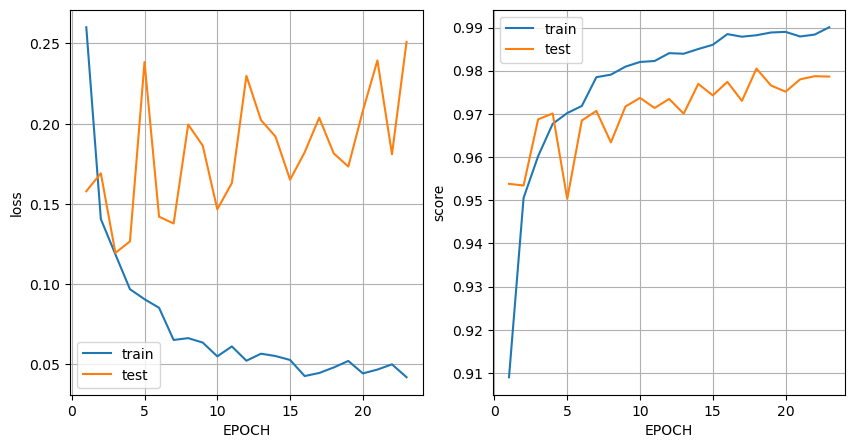

In [24]:
pp=utils.Plot_History(history)
pp.draw()